# Ch09 改善神經網路的訓練成效

#### 9.1 權重初始化 (weight initialization)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_normal, glorot_uniform

In [51]:
n_input = 784         #輸入層神經元
n_dense = 256         #密集層神經元

#### 設定權重的初始值

In [52]:
b_init = Zeros()          #先用Zeros()將密集層的偏值b都設為0

In [53]:
#w_init = RandomNormal(stddev=1.0)  #先用標準常態分佈隨機取樣來初始化權重
'''
Normal Distribution是平均為0標準差為1的常態分佈，
在這樣條件下，有68.2%的機率取樣出來的值會介於-1 ~ 1之間
               95.4%       取出來介於-2 ~ 2之間
               99.7%       介於-3 ~ 3 之間
'''
w_init = glorot_normal()
#w_init = glorot_uniform()

#### 建構神經網路

In [54]:
model = Sequential()
model.add(Dense(n_dense,                    #密集層的神經元
                input_dim=n_input,          #此密集層接收784個輸入值
                kernel_initializer=w_init,  #kernel_initializer()可設定權重的初始值，這邊我們讓她從標準常態分布中取樣
                bias_initializer=b_init))   #bias_initializer()偏值初始值設定，這邊都設為0
#model.add(Activation('sigmoid'))
#model.add(Activation('tanh'))
model.add(Activation('relu'))

#### 產生輸入資料, 並算出密集層 256 個神經元的激活值

In [55]:
x = np.random.random((1,n_input))  #利用np.random.random()生成784個介於0~1的浮點亂數，充當影像像素值作為輸入資料

In [56]:
a = model.predict(x)   #用predict()將輸入資料x傳入密集層(有256個神經元)，用前向傳播算出這一層所有的神經元激活值a

1/1 [==============================] - 0s 43ms/step


#### 畫圖查看各激活值的分布

In [57]:
a.shape

(1, 256)

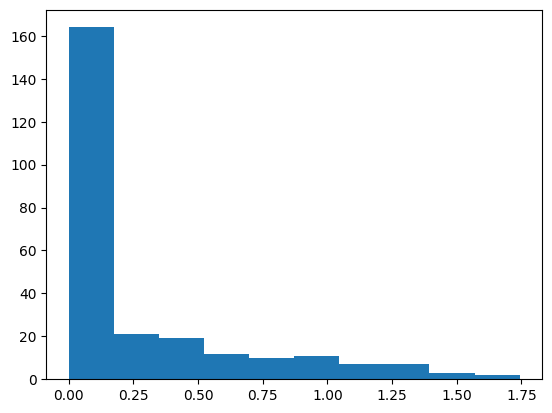

In [58]:
_ = plt.hist(np.transpose(a))     #轉置矩陣，將一列256行轉成256列一行
#由於神經網路的初始權重參數是隨機設定的, 參雜了隨機性,每次重跑都會有些微差異